<h4><b>Introduction:</b></h4>
<h5>Classify fashion items into 10 categories using a deep learning</h5>

<h4><b>About the dataset: </b></h4>
<h5>Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.</h5>

<ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul>


<h4><b>Importing necessary libraries</b></h4>

In [45]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

<h4><b>Loading the dataset</b></h4>

In [35]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


<h4><b>Visualizing the data</h4></b>

In [5]:
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

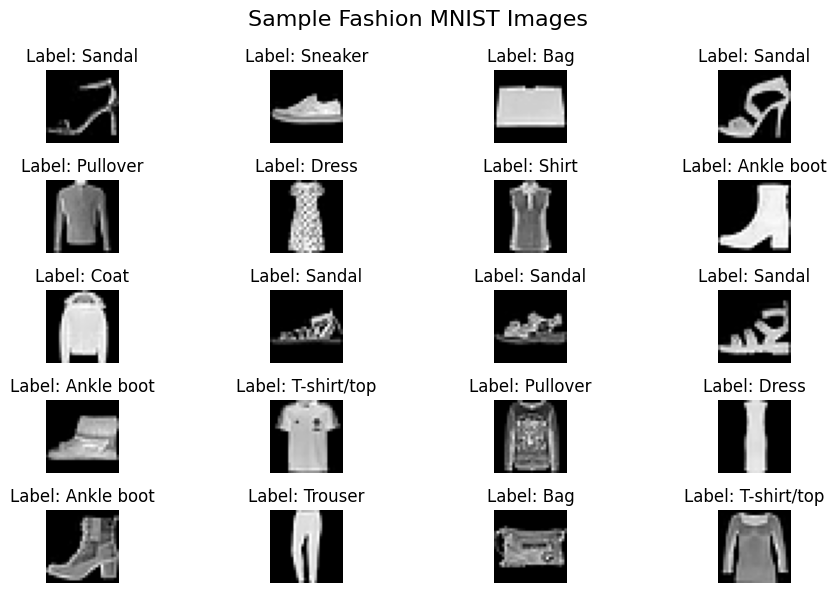

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 6))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='grey')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2642/419202381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='cubehelix')


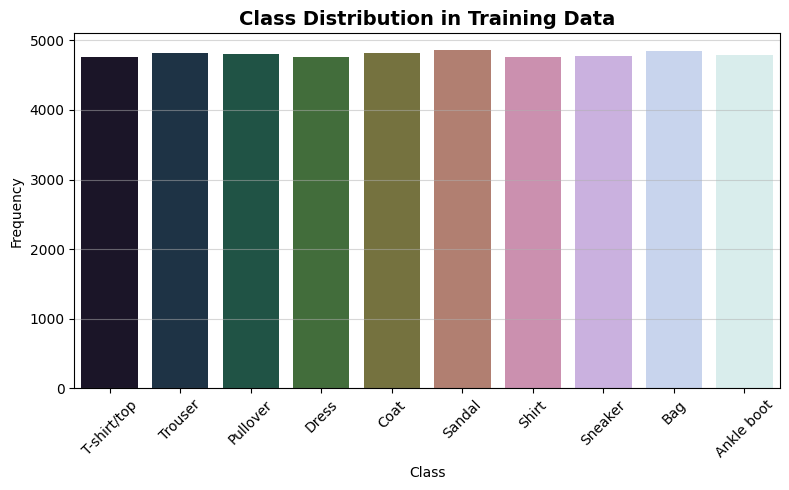

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='cubehelix')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Class Distribution in Training Data", fontsize=14, weight='bold')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

<h4><b>Preprocessing the data</h4></b>

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0  

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}, x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


x_train shape: (48000, 28, 28, 1), x_val shape: (12000, 28, 28, 1)
y_train shape: (48000,), y_val shape: (12000,)


<h4><b>Building the model</b></h4>

<h5>Model Overview</h5>
<ul>
  <li>The model is created using a Sequential stack of layers.</li>
  <li>The first <code>Conv2D</code> layer applies 32 filters of size 3x3 with ReLU activation to detect basic features like edges, followed by a <code>MaxPooling2D</code> layer to reduce the spatial dimensions.</li>
  <li>The second <code>Conv2D</code> layer, with 64 filters, extracts more complex patterns, followed again by <code>MaxPooling2D</code> to further reduce dimensionality.</li>
  <li>The <code>Flatten</code> layer converts the 2D feature maps into a 1D vector for the fully connected layers.</li>
  <li>A <code>Dense</code> layer with 128 neurons and ReLU activation processes the features, followed by a <code>Dropout</code> layer to reduce overfitting.</li>
  <li>The final <code>Dense</code> layer, with 10 neurons and softmax activation, outputs the probability distribution for the 10 classes.</li>
  <li>The <code>model.summary()</code> is displayed to confirm the architecture.</li>
</ul>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-02 16:45:46.476694: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

<h4><b>Compile the Model</b></h4>

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  

<h4><b>Training the Model</b></h4>

Epoch 1/10


2025-05-02 16:46:12.313734: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7298 - loss: 0.7745 - val_accuracy: 0.8653 - val_loss: 0.3755
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8684 - loss: 0.3669 - val_accuracy: 0.8868 - val_loss: 0.3063
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - accuracy: 0.8901 - loss: 0.3031 - val_accuracy: 0.8956 - val_loss: 0.2872
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9023 - loss: 0.2684 - val_accuracy: 0.9018 - val_loss: 0.2590
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9083 - loss: 0.2460 - val_accuracy: 0.8992 - val_loss: 0.2657
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9173 - loss: 0.2225 - val_accuracy: 0.9101 - val_loss: 0.2432
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9254 - loss: 0.2007 - val_accuracy: 0.9071 - val_loss: 0.2558
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.9308 - loss: 0.1887 - val_accurac

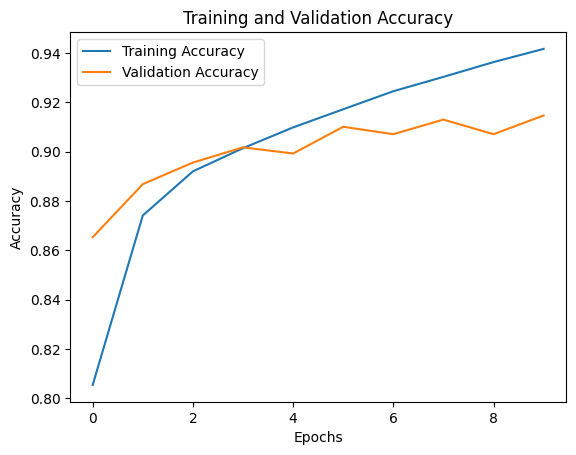

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

<h4><b>Evaluation of Model</b></h4>

In [73]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9148 - loss: 0.2432
Test Loss: 0.2306
Test Accuracy: 92.13%


In [75]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


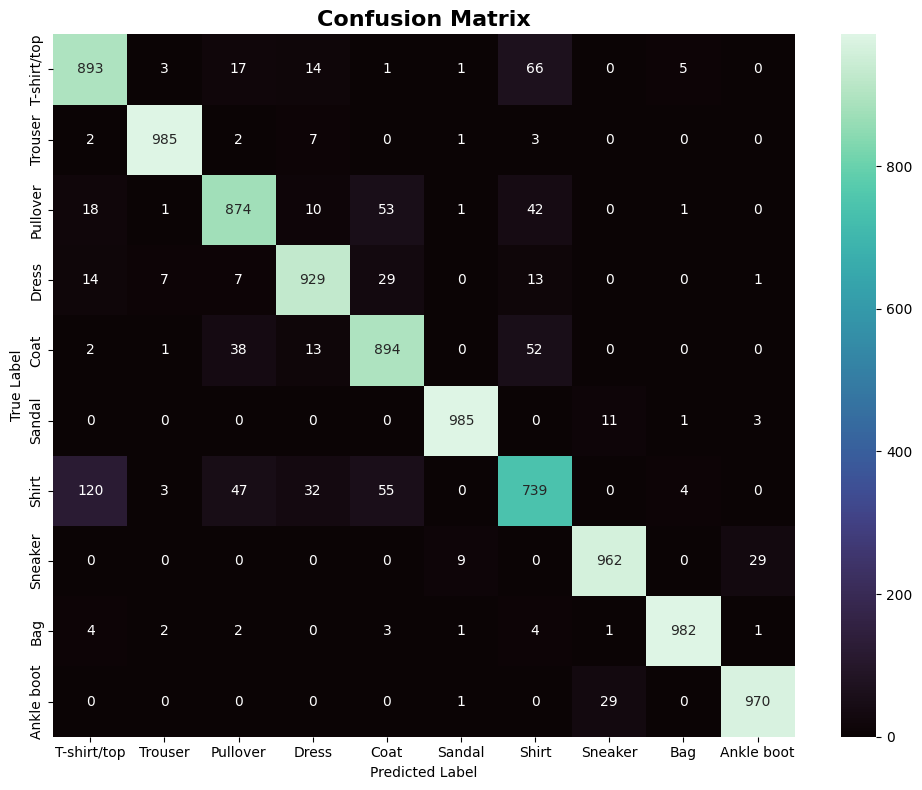

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

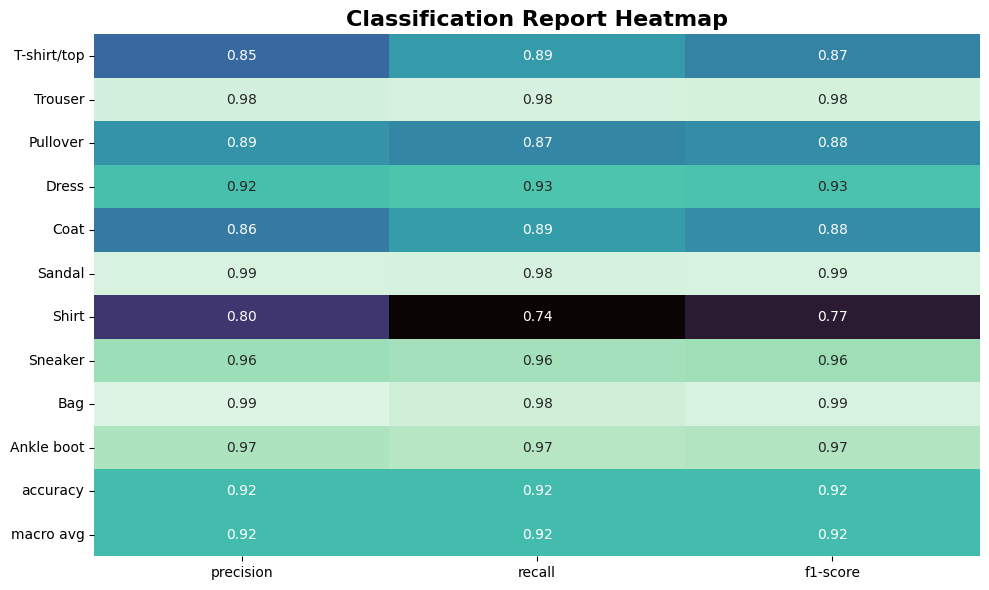

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="mako", cbar=False, fmt=".2f")
plt.title("Classification Report Heatmap", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

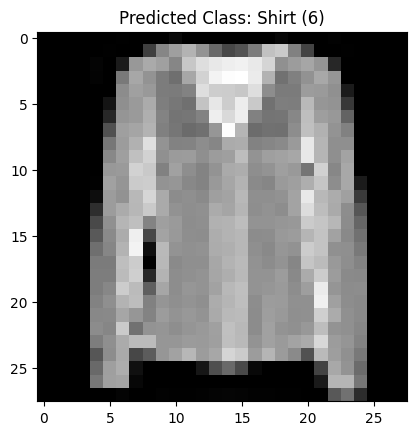

In [92]:
test_image = 937

predicted_class = y_pred[test_image]

plt.imshow(x_test[test_image].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_class]} ({predicted_class})")
plt.show()

<h4>Conclusion</h4>
<ul>
  <li>Developed a CNN-based model to classify clothing images from the Fashion MNIST dataset into 10 categories.</li>
  <li>Achieved strong test accuracy, indicating good generalization performance.</li>
  <li>Used visualization, confusion matrix, and classification report to evaluate predictions and understand model behavior.</li>
  <li>Demonstrated the practical use of deep learning for real-world image classification problems.</li>
</ul>
